In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import os

for dirname, _, filenames in os.walk('./modified_inputs/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./modified_inputs/no_missing_train.csv


In [2]:
no_missing = pd.read_csv("./modified_inputs/no_missing_train.csv")
no_missing

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299857,299995,0,1,2,9.0,0,0,2,1,12.730812,129.99749
299858,299996,1,1,0,6.0,0,1,2,1,26.633182,19.85819
299859,299997,3,0,0,9.0,1,1,0,4,11.898250,111.41364
299860,299998,0,2,2,1.0,0,1,2,4,6.175738,115.89080


In [3]:
# Encoding the data
no_missing["Brand"] = LabelEncoder().fit_transform(no_missing["Brand"])
no_missing["Material"] = LabelEncoder().fit_transform(no_missing["Material"])
no_missing["Size"] = LabelEncoder().fit_transform(no_missing["Size"])
no_missing["Laptop Compartment"] = LabelEncoder().fit_transform(no_missing["Laptop Compartment"])
no_missing["Waterproof"] = LabelEncoder().fit_transform(no_missing["Waterproof"])
no_missing["Style"] = LabelEncoder().fit_transform(no_missing["Style"])
no_missing["Color"] = LabelEncoder().fit_transform(no_missing["Color"])
no_missing

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299857,299995,0,1,2,9.0,0,0,2,1,12.730812,129.99749
299858,299996,1,1,0,6.0,0,1,2,1,26.633182,19.85819
299859,299997,3,0,0,9.0,1,1,0,4,11.898250,111.41364
299860,299998,0,2,2,1.0,0,1,2,4,6.175738,115.89080


In [4]:
# Specify the target before dropping the target column from the dataframe
target = no_missing["Price"]
no_missing.drop("id", axis=1, inplace=True)
no_missing.drop("Price", axis=1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaler.fit(no_missing)
scaled_data = scaler.transform(no_missing)
scaled_data

array([[-0.7310317 , -0.52894872, -0.02877963, ...,  1.08827632,
        -1.48039675, -0.92125175],
       [-0.7310317 , -1.37852488,  1.1453587 , ..., -0.07256259,
         0.20546636,  1.2987899 ],
       [ 1.26545238, -0.52894872,  1.1453587 , ..., -0.07256259,
         1.3293751 , -0.19897422],
       ...,
       [ 0.59995768, -1.37852488, -1.20291795, ..., -1.23340151,
         0.76742073, -0.88012488],
       [-1.39652639,  0.32062744,  1.1453587 , ...,  1.08827632,
         0.76742073, -1.70151025],
       [ 1.26545238, -1.37852488,  1.1453587 , ..., -1.23340151,
        -1.48039675,  0.07734728]])

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

In [6]:
# Create a XGBoost Classifier
clf = xgb.XGBRegressor(n_estimators=100000, learning_rate=0.001, max_depth=3, random_state=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
r2 = r2_score(y_test, predictions)
squared_error = root_mean_squared_error(y_test, predictions)
print(squared_error)
predictions

38.95355780939536


array([80.23175 , 82.140724, 84.190956, ..., 82.27172 , 79.851524,
       81.1387  ], dtype=float32)

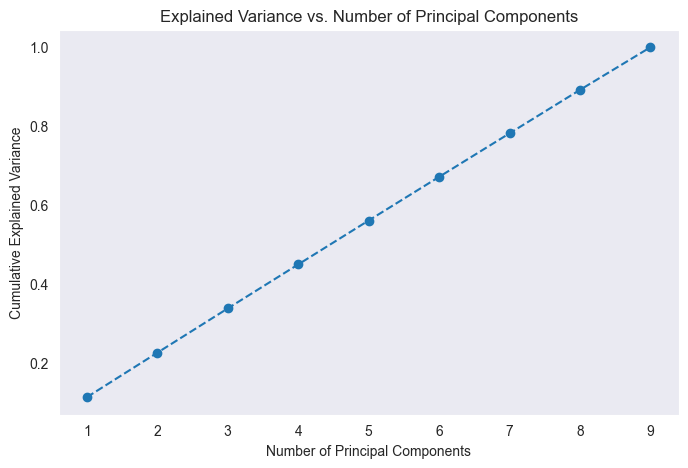

Explained Variance Ratios: [0.11393657 0.11258302 0.11215161 0.11143965 0.11118578 0.11049127
 0.1102515  0.11002907 0.10793152]
Cumulative Variance: [0.11393657 0.22651959 0.3386712  0.45011086 0.56129664 0.67178791
 0.78203941 0.89206848 1.        ]


In [7]:
# Introducing PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

In [8]:
pca.transform(scaled_data)

array([[ 1.10498042,  1.27491742, -1.05071151, ..., -0.5439637 ,
         1.05754549,  0.32443122],
       [-0.39105576,  0.12093221,  0.22636844, ...,  0.04685441,
        -1.57547589,  1.36572706],
       [ 1.25659011, -1.31219143, -0.71764672, ..., -0.23291707,
        -1.09889251, -0.19425933],
       ...,
       [-0.10985698,  0.96554618, -0.9974211 , ...,  0.9331567 ,
        -1.50284423,  1.5417469 ],
       [-1.45778543, -0.94514541, -0.94170277, ..., -1.3322161 ,
         1.8430453 ,  0.17952654],
       [-1.58506666, -0.87853718, -1.01484901, ...,  0.12421455,
        -1.02695022, -0.31620593]])

In [9]:
X_pca = pca.transform(scaled_data)
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [24]:
# Create a XGBoost Classifier
clf = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=21)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
squared_error = root_mean_squared_error(y_test, predictions)
print(squared_error)
predictions

38.97787581267344


array([82.34362 , 80.76777 , 80.825966, ..., 81.59578 , 79.77296 ,
       81.42273 ], dtype=float32)

In [65]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean = root_mean_squared_error(y_test, y_pred)
print(mean)

0:	learn: 39.0510325	total: 10.7ms	remaining: 1.06s
1:	learn: 39.0492936	total: 21.2ms	remaining: 1.04s
2:	learn: 39.0480254	total: 30.1ms	remaining: 974ms
3:	learn: 39.0463251	total: 39.8ms	remaining: 955ms
4:	learn: 39.0454932	total: 48.6ms	remaining: 923ms
5:	learn: 39.0448379	total: 58.3ms	remaining: 914ms
6:	learn: 39.0438148	total: 68.1ms	remaining: 905ms
7:	learn: 39.0430304	total: 76.6ms	remaining: 881ms
8:	learn: 39.0422706	total: 86.5ms	remaining: 875ms
9:	learn: 39.0416490	total: 96.8ms	remaining: 871ms
10:	learn: 39.0410716	total: 109ms	remaining: 884ms
11:	learn: 39.0402686	total: 118ms	remaining: 867ms
12:	learn: 39.0398957	total: 127ms	remaining: 849ms
13:	learn: 39.0392483	total: 135ms	remaining: 832ms
14:	learn: 39.0388863	total: 144ms	remaining: 816ms
15:	learn: 39.0384772	total: 153ms	remaining: 802ms
16:	learn: 39.0376535	total: 162ms	remaining: 791ms
17:	learn: 39.0371135	total: 171ms	remaining: 779ms
18:	learn: 39.0366817	total: 180ms	remaining: 767ms
19:	learn: 3

In [51]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean = root_mean_squared_error(y_test, y_pred)
print(mean)

38.95356389366775
